<a href="https://colab.research.google.com/github/mosaabseta/ML/blob/main/classification_with_nnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q tensorflow tensorflow-datasets 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

datasets

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [3]:
builder = tfds.builder("rock_paper_scissors")
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

prep

In [4]:
ds_train = tfds.load("rock_paper_scissors",split="train")
ds_test = tfds.load("rock_paper_scissors",split="test")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteCGW1VB/rock_paper_scissors-train.tfrec…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteCGW1VB/rock_paper_scissors-test.tfreco…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


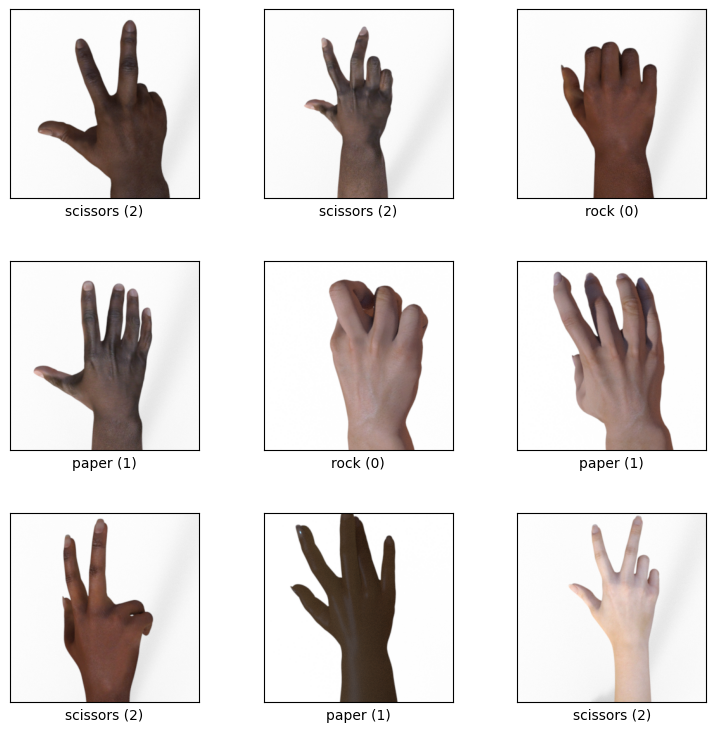

In [5]:
show = tfds.show_examples(info, ds_train)

load data as numpy and use one channel cuz u need edges to classify images ,
red = (:,:,0) fr example

In [6]:
train_images = np.array([example["image"].numpy()[:,:,0] for example in ds_train])
train_lables = np.array([example["label"].numpy() for example in ds_train])

test_images = np.array([example["image"].numpy()[:,:,0] for example in ds_test])
test_lables = np.array([example["label"].numpy() for example in ds_test])

In [7]:
type(train_images[0])
train_images.shape
test_images.shape

(372, 300, 300)

reshape to gray scale

In [8]:
train_images = train_images.reshape(2520,300,300,1)
test_images = test_images.reshape(372,300,300,1)

rescale from 0-1

In [9]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images /= 255
test_images /=255

train network - basic NN

In [10]:
model = keras.Sequential(
    [
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),
     keras.layers.Dense(256, activation="relu"),
     keras.layers.Dense(3,activation="softmax")
    ]
)

model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)
model.fit(train_images,train_lables,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 72s 890ms/step - loss: 21.0945 - accuracy: 0.4052
Epoch 2/5
79/79 [==============================] - 72s 906ms/step - loss: 1.9782 - accuracy: 0.6389
Epoch 3/5
79/79 [==============================] - 70s 885ms/step - loss: 1.4139 - accuracy: 0.6909
Epoch 4/5
79/79 [==============================] - 74s 942ms/step - loss: 0.3625 - accuracy: 0.8825
Epoch 5/5
79/79 [==============================] - 72s 908ms/step - loss: 0.4241 - accuracy: 0.8599


In [11]:
model.evaluate(test_images, test_lables)

12/12 [==============================] - 3s 190ms/step - loss: 3.0533 - accuracy: 0.4624


[3.0532801151275635, 0.46236559748649597]

train model - CNN (general parameters with 3*3 grid)

basic is over fit cuz it picks alot unneccesary details

In [11]:
model = keras.Sequential(
    [
        keras.layers.Conv2D(64,3,activation="relu",input_shape=(300,300,1)),
     keras.layers.Conv2D(32,3,activation="relu"),
     keras.layers.Flatten(),
     keras.layers.Dense(3,activation="softmax"),

    ]
)
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)
model.fit(train_images,train_lables,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 26s 167ms/step - loss: 6.7531 - accuracy: 0.6083
Epoch 2/5
79/79 [==============================] - 11s 138ms/step - loss: 0.5876 - accuracy: 0.8429
Epoch 3/5
79/79 [==============================] - 11s 141ms/step - loss: 0.1202 - accuracy: 0.9881
Epoch 4/5
79/79 [==============================] - 11s 141ms/step - loss: 0.0649 - accuracy: 0.9909
Epoch 5/5
79/79 [==============================] - 11s 141ms/step - loss: 0.0132 - accuracy: 0.9988


In [12]:
model.evaluate(test_images, test_lables)

12/12 [==============================] - 2s 148ms/step - loss: 1.4099 - accuracy: 0.5161


[1.4098701477050781, 0.5161290168762207]

still over fitting lets try anothor approach

In [15]:
model = keras.Sequential(
    [
        keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)),
        keras.layers.Conv2D(64,3,activation="relu"),
     keras.layers.Conv2D(32,3,activation="relu"),
     keras.layers.MaxPool2D(2,2),
     keras.layers.Dropout(0.5),
     keras.layers.Flatten(),
     keras.layers.Dense(128,activation="relu"),
     keras.layers.Dense(3,activation="softmax"),

    ]
)
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)
model.fit(train_images,train_lables,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 4s 28ms/step - loss: 0.8967 - accuracy: 0.6774
Epoch 2/5
79/79 [==============================] - 2s 28ms/step - loss: 0.1263 - accuracy: 0.9675
Epoch 3/5
79/79 [==============================] - 2s 30ms/step - loss: 0.0369 - accuracy: 0.9909
Epoch 4/5
79/79 [==============================] - 2s 29ms/step - loss: 0.0119 - accuracy: 0.9980
Epoch 5/5
79/79 [==============================] - 2s 28ms/step - loss: 0.0047 - accuracy: 1.0000


In [16]:
model.evaluate(test_images, test_lables)

12/12 [==============================] - 1s 34ms/step - loss: 1.5035 - accuracy: 0.7043


[1.503451943397522, 0.7043010592460632]

tuning data


In [17]:
pip install -U keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 17.4 MB/s eta 0:00:00


In [19]:
from kerastuner.tuners import RandomSearch

In [21]:
def build_model(hp):
  model = keras.Sequential()

  model.add( keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))

  model.add( keras.layers.Conv2D(64,3,activation="relu"))
  model.add( keras.layers.Conv2D(32,3,activation="relu"))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(  keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer",[62,128,256,512,102]),activation="relu"))

  model.add(keras.layers.Dense(3,activation="softmax"))

  model.compile(
      optimizer="adam",
      loss=keras.losses.SparseCategoricalCrossentropy(),
      metrics=["accuracy"]
  )

  return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=32,
    )

tuner.search(train_images,train_lables,validation_data=(test_images,test_lables),epochs=5,batch_size=32)



Trial 5 Complete [00h 00m 23s]
val_loss: 0.9620843529701233

Best val_loss So Far: 0.6420762538909912
Total elapsed time: 00h 01m 41s


In [22]:
best_model = tuner.get_best_models()[0]

In [23]:
best_model.evaluate(test_images,test_lables)

12/12 [==============================] - 0s 12ms/step - loss: 0.6421 - accuracy: 0.7473


[0.6420762538909912, 0.7473118305206299]

In [24]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 99, 99, 1)        0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 97, 97, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 32)        0         
                                                                 
 flatten (Flatten)           (None, 70688)             0

adding more layers and filters

In [27]:
def build_model(hp):
  model = keras.Sequential()

  model.add( keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add( keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters",[16,32,64]),3,activation="relu"))


  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(  keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer",[62,128,256,512,102]),activation="relu"))

  model.add(keras.layers.Dense(3,activation="softmax"))

  model.compile(
      optimizer="adam",
      loss=keras.losses.SparseCategoricalCrossentropy(),
      metrics=["accuracy"]
  )

  return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=32,
    directory="./using_tunner_wiz_more_than_filter"
    )

tuner.search(train_images,train_lables,validation_data=(test_images,test_lables),epochs=5,batch_size=32)



Trial 32 Complete [00h 00m 13s]
val_loss: 0.6087436676025391

Best val_loss So Far: 0.5395609140396118
Total elapsed time: 00h 07m 16s


In [28]:
best_model = tuner.get_best_models()[0]

In [29]:
best_model.evaluate(test_images,test_lables)

12/12 [==============================] - 0s 11ms/step - loss: 0.5396 - accuracy: 0.8468


[0.5395609140396118, 0.8467742204666138]

In [30]:
best_model.save("./best_model")

In [33]:
loaded_model = keras.models.load_model("./best_model")

In [34]:
loaded_model.evaluate(test_images,test_lables)

12/12 [==============================] - 0s 9ms/step - loss: 0.5396 - accuracy: 0.8468


[0.5395609140396118, 0.8467742204666138]

plot images from numpy array

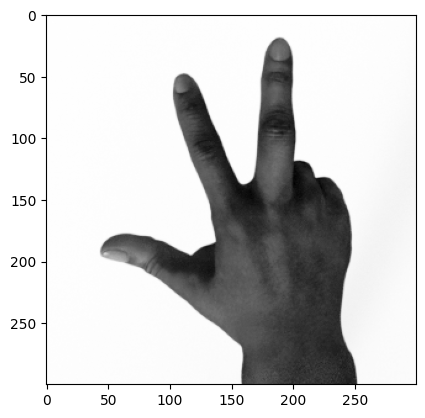

In [38]:
image = train_images[0].reshape(300,300)
plt.imshow(image)
plt.imshow(image,cmap="Greys_r")

plot in rgb scal

(300, 300, 3)

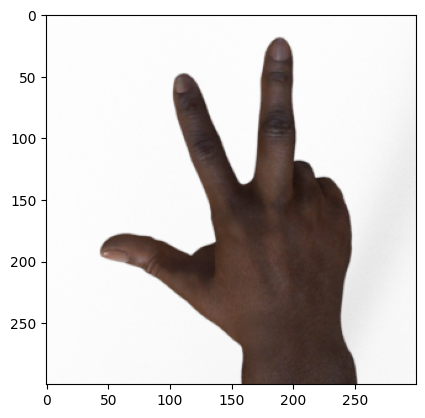

In [45]:
rgb_images = np.array([example["image"].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]

plt.imshow(rgb_image)
rgb_image.shape

read image from internet to numpy

In [49]:
import imageio

im = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/University_of_Khartoum_001.JPG/278px-University_of_Khartoum_001.JPG")

im_np = np.asarray(im)

im_np.shape

<ipython-input-49-406788f484bc>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/University_of_Khartoum_001.JPG/278px-University_of_Khartoum_001.JPG")


(208, 278, 3)